In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip -q install healpy
!pip install git+https://github.com/vafaei-ar/ccgpack.git

In [4]:
import numpy as np
import healpy as hp
import pylab as plt
import ccgpack as ccg

In [5]:
map = '/content/drive/MyDrive/CMB/map1n_allz_rtaapixlw_2048_1.fits'
string_map = hp.read_map(map,nest=1,verbose=0)

In [6]:
gauss = "/content/drive/MyDrive/CMB/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits"
gaussian_map = hp.read_map(gauss,nest=1,verbose=0)

In [7]:
g_mu = 1e-6
cmb_with_string = gaussian_map + (g_mu * string_map)




# Power Spectrum------------------------------------------------------------------------

In [12]:
g_map = hp.sphtfunc.anafast(gaussian_map)

In [11]:
s_map = hp.sphtfunc.anafast(string_map)


In [30]:
CMB_map = hp.sphtfunc.anafast(cmb_with_string)

In [31]:
l =  np.linspace(0, 6000, 6144)
y1 = l * (l + 1) * g_map
y2 = l * (l + 1) * s_map
y3 = l * (l + 1) * CMB_map

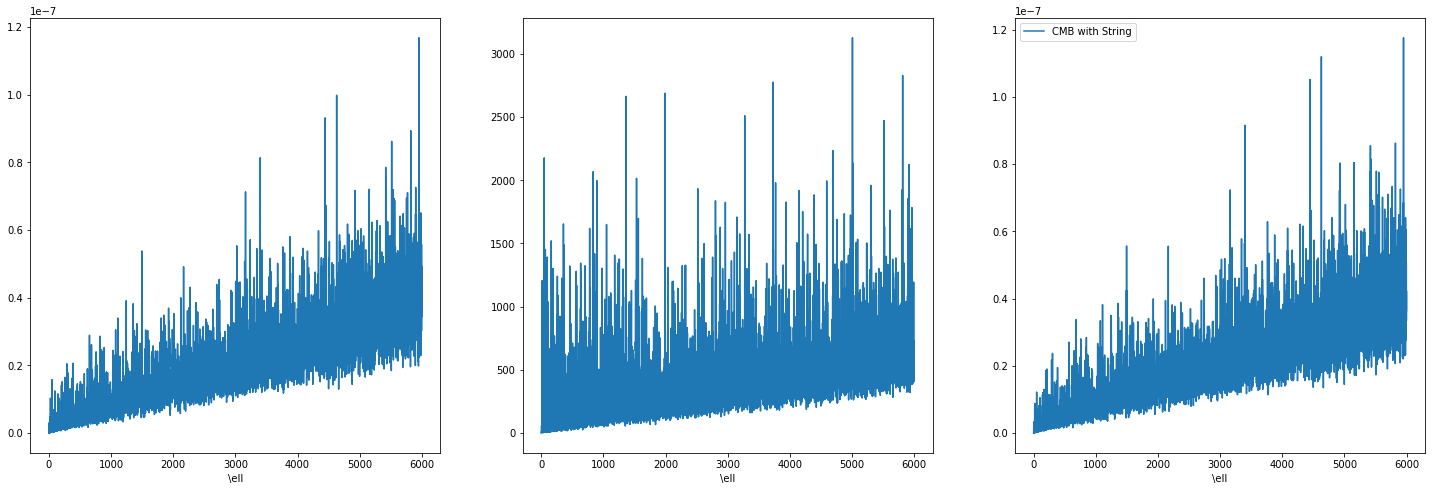

In [32]:
plt.figure(figsize = (25, 8))
plt.subplot(1, 3, 1)
plt.plot(l, y1, label = "Gaussian")
plt.xlabel("\ell")
plt.subplot(1, 3, 2)
plt.plot(l, y2, label = "String")
plt.xlabel("\ell")
plt.subplot(1, 3, 3)
plt.plot(l, y3, label = "CMB with String")
plt.xlabel("\ell")
plt.legend()
plt.show()

In [34]:
ss_map = s_map * g_mu
f = l * (l + 1) * ss_map

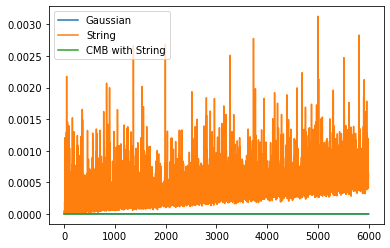

In [35]:
plt.plot(l, y1, label = "Gaussian")
plt.plot(l, f, label = "String")
plt.plot(l, y3, label = "CMB with String")
plt.legend()
plt.show()